## Projet - Sujet 3 - Prédiction du cout de construction et / ou prix de ventes de batiments
## Prescillia Zeitoun

In [1]:
#Basics package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import warnings
warnings.filterwarnings(action='ignore')

# import required modules
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# import required modules for Machine Learning
from sklearn.linear_model import LinearRegression, ElasticNet
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [2]:
# Reading excel files from the second line 
df =  pd.read_excel('Residential-Building-Data-Set.xlsx',header=1)
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


## Description of the dataset


**PROJECT DATES and PROJECT PHYSICAL AND FINANCIAL VARIABLES**

- V-1 Project locality defined in terms of zip codes
- V-2 Total floor area of the building
- V-3 Lot area
- V-4 Total preliminary estimated construction cost based on the prices at the beginning of the project
- V-5 Preliminary estimated construction cost based on the prices at the beginning of the project
- V-6	Equivalent preliminary estimated construction cost based on the prices at the beginning of the project in a selected base year
- V-7	Duration of construction
- V-8	Price of the unit at the beginning of the project per m2
- **V-9	Actual sales prices (output) - TARGET**
- V-10	Actual construction costs (output)

**Economics variables**

- V-11	The number of building permits issued
- V-12	Building services index (BSI) b for a preselected base year a
- V-13	Wholesale price index (WPI) c of building materials for the base year
- V-14	Total floor areas of building permits issued by the city/municipality
- V-15	Cumulative liquidity d
- V-16	Private sector investment in new buildings 
- V-17	Land price index for the base year a
- V-18	The number of loans extended by banks in a time resolution e
- V-19	The amount of loans extended by banks in a time resolution e
- V-20	The interest rate for loan in a time resolution e
- V-21	The average construction cost of buildings by private sector at the time of completion of construction 
- V-22	The average of construction cost of buildings by private sector at the beginning of the construction 
- V-23	Official exchange rate with respect to dollars 
- V-24	Nonofficial (street market) exchange rate with respect to dollars h 
- V-25	Consumer price index (CPI) i in the base year a
- V-26	CPI of housing, water, fuel & power in the base year a
- V-27	Stock market index j
- V-28	Population of the city
- V-29	Gold price per ounce

#### We will work only on the PROJECT DATES and PROJECT PHYSICAL AND FINANCIAL VARIABLES due to time of running.
### Our Target is the Actual sales prices (output) named  'V-9' in our dataset

In [3]:
df = df[['START YEAR','START QUARTER','COMPLETION YEAR','COMPLETION QUARTER','V-1','V-2','V-3','V-4','V-5','V-6','V-7','V-8','V-9']]
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-9
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,16,1200,2200
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,23,2900,5000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,15,630,1200
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,4,140,165
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,13,5000,5500


## Exploratory Data Analysis (EDA)

In [4]:
# Description of the dataset
df.describe()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-9
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,81.483871,2.190860,82.951613,2.586022,9.728495,1729.044355,426.114247,327.904086,163.118280,554.419839,6.266129,1088.118280,1387.432796
std,4.182141,1.083382,4.223898,1.123442,6.563309,1802.371491,490.076498,563.544337,112.604343,275.105953,2.096495,995.826172,1206.083047
min,72.000000,1.000000,73.000000,1.000000,1.000000,200.000000,60.000000,3.700000,10.000000,193.080000,2.000000,40.000000,50.000000
25%,78.000000,1.000000,80.000000,2.000000,4.000000,720.000000,190.000000,67.800000,80.000000,391.677500,5.000000,440.000000,577.500000
50%,82.000000,2.000000,84.000000,3.000000,8.000000,1220.000000,300.000000,164.700000,140.000000,522.455000,6.000000,805.000000,1000.000000
75%,85.000000,3.000000,87.000000,4.000000,17.000000,2100.000000,490.500000,366.050000,230.000000,667.905000,7.000000,1300.000000,1700.000000
max,88.000000,4.000000,90.000000,4.000000,20.000000,15670.000000,5000.000000,7208.200000,640.000000,3436.930000,23.000000,5700.000000,6800.000000


In [5]:
# Shape of the dataset : 372 rows and 14 variables (columns)
df.shape

(372, 13)

In [6]:
# Unique value per feature
df.nunique()

START YEAR             17
START QUARTER           4
COMPLETION YEAR        18
COMPLETION QUARTER      4
V-1                    20
V-2                   216
V-3                   105
V-4                   337
V-5                    50
V-6                   314
V-7                    16
V-8                   121
V-9                   117
dtype: int64

In [7]:
#See variables group by types and we have here only numerical variables
g = df.columns.to_series().groupby(df.dtypes).groups
g

{int64: ['START YEAR', 'START QUARTER', 'COMPLETION YEAR', 'COMPLETION QUARTER', 'V-1', 'V-5', 'V-7', 'V-8', 'V-9'], float64: ['V-2', 'V-3', 'V-4', 'V-6']}

In [8]:
#Let's see distribution between all the numericals variables
a=sns.pairplot(df, size=8).set(title='Pairplot of the features');
a

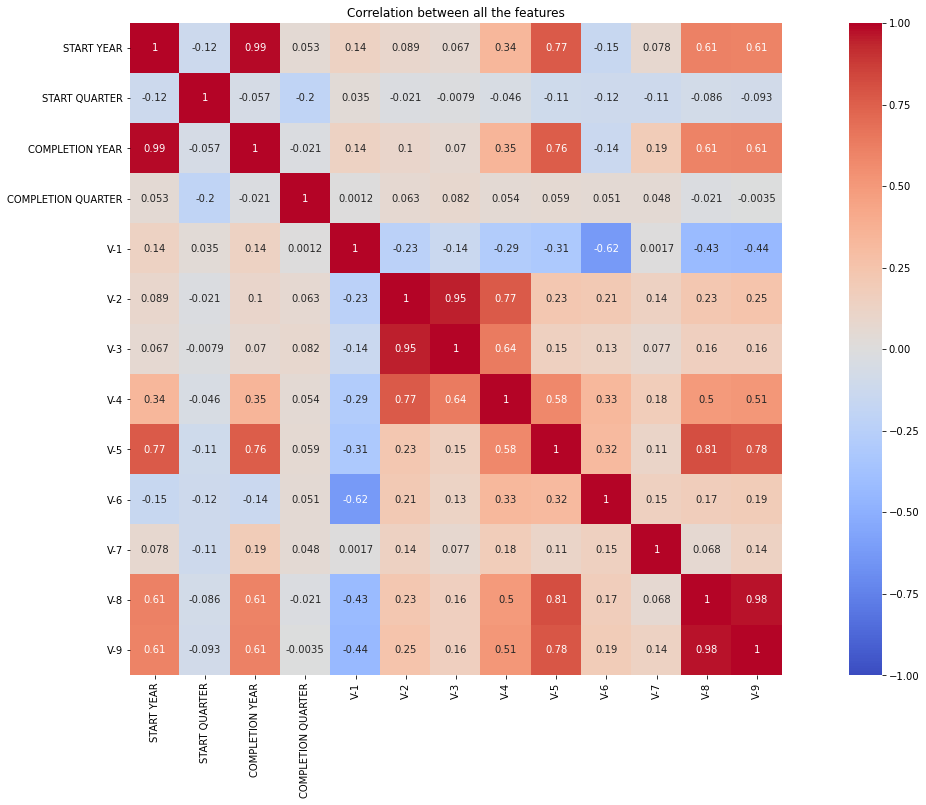

In [9]:
#See correlation between all the features
plt.figure(figsize=(24,12))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True).set(title='Correlation between all the features');

We can see some interesting things on these plots.
1. There is big correlation between the variables START YEAR and COMPLETION YEAR
2. No one distributions follow normal distributions
3. The distribution of the target seem to be representative on the other variables

Skewness: 1.877488
Kurtosis: 3.750821


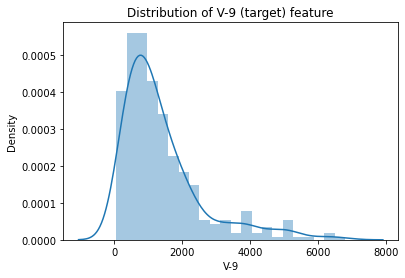

In [10]:
df['V-9'].describe()
sns.distplot(df['V-9']).set(title='Distribution of V-9 (target) feature')

#skewness and kurtosis
print("Skewness: %f" % df['V-9'].skew())
print("Kurtosis: %f" % df['V-9'].kurt())

[Text(0.5, 1.0, 'Distribution of V-8 feature')]

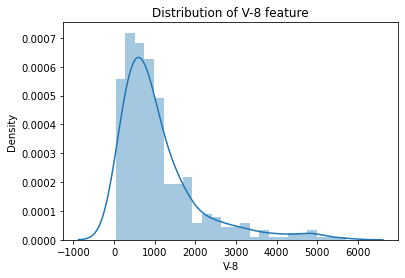

In [11]:
df['V-8'].describe()
sns.distplot(df['V-8']).set(title='Distribution of V-8 feature')

In [12]:
## The target and the variable V-8 seems to have a big correlation
correlation = df["V-9"].corr(df["V-8"])
correlation

0.9764315435129781

# Models of Machine Learning on brut data : 
### Our metrics to evaluate the model will be the score. When score is called on regressors, the coefficient of determination - R2 is calculated by default. As in classifiers, the score method is simply a shorthand to calculate R2 since it is commonly used to assess the performance of a regressor.

In [13]:
# Functions which allow to return the score of a model choose in argument
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print(str(algorithme))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

# Put all the performances in a dictionnary
performances = dict()

In [14]:
# X is our features and y our target which is the column 'V-9'
X = df.loc[:, ~df.columns.isin(['V-9'])]
y = df.loc[:, df.columns == 'V-9']

#### As you understand we have here a regression problem

In [15]:
# Our target
y

,V-9
0,2200
1,5000
2,1200
3,165
4,5500
...,...
367,1100
368,740
369,860
370,1100


## Split all dataset in train and test

In [16]:
# We will split our dataset in Train (70%) and Test (30%)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=random.seed())
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(260, 12)
(112, 12)
(260, 1)
(112, 1)


In [17]:
# Overview of our X_train
X_train

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8
255,87,1,88,3,14,720.0,190.0,165.6,230,354.48,6,1200
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,16,1200
247,86,1,87,4,14,670.0,180.0,174.2,260,469.40,7,1100
220,83,1,85,1,12,380.0,100.0,60.8,160,547.10,8,650
213,81,2,82,3,11,2650.0,590.0,238.5,90,449.32,5,810
...,...,...,...,...,...,...,...,...,...,...,...,...
95,86,3,87,2,4,1130.0,260.0,339.0,300,511.56,3,1400
173,85,3,87,1,7,1980.0,440.0,495.0,250,549.19,6,1700
30,86,1,88,3,2,2600.0,560.0,598.0,230,415.24,10,2100
181,82,1,83,3,8,620.0,160.0,62.0,100,436.04,6,1100


## Let's try some models

In [18]:
#List of all Algo we will try
liste_models=[LinearRegression,ElasticNet,KNeighborsRegressor,DecisionTreeRegressor,MLPRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor]

#Foor loop to lauch all of it and see their score
for i in range(len(liste_models)):
    algorithme=liste_models[i]()
    score      = get_score(algorithme, X_train, X_test, Y_train, Y_test)
    performances[algorithme] = score
    print(score)
    print('------------------------------------------------------')

LinearRegression()
0.9646713098361648
------------------------------------------------------
ElasticNet()
0.9670222485419409
------------------------------------------------------
KNeighborsRegressor()
0.8591850176727075
------------------------------------------------------
DecisionTreeRegressor()
0.9106268078820714
------------------------------------------------------
MLPRegressor()
0.954881804018664
------------------------------------------------------
AdaBoostRegressor()
0.9189637697558997
------------------------------------------------------
GradientBoostingRegressor()
0.966657715383933
------------------------------------------------------
RandomForestRegressor()
0.9471887853872675
------------------------------------------------------
ExtraTreesRegressor()
0.9761236073982685
------------------------------------------------------
BaggingRegressor()
0.9524240761689422
------------------------------------------------------


In [19]:
from collections import OrderedDict
dico_ordonne = OrderedDict(performances)

import pandas as pd
df_result1 = pd.DataFrame()
df_result1["perf"] = dico_ordonne.values() 
df_result1["algo"] = dico_ordonne.keys()
df_result1['nom_algo'] = df_result1.algo.apply(lambda algo: str(algo).split('(')[0])
df_result1.set_index('nom_algo', inplace=True)
df_result1

,perf,algo
nom_algo,,
LinearRegression,0.964671,LinearRegression()
ElasticNet,0.967022,ElasticNet()
KNeighborsRegressor,0.859185,KNeighborsRegressor()
DecisionTreeRegressor,0.910627,DecisionTreeRegressor()
MLPRegressor,0.954882,MLPRegressor()
AdaBoostRegressor,0.918964,"(DecisionTreeRegressor(max_depth=3, random_sta..."
GradientBoostingRegressor,0.966658,([DecisionTreeRegressor(criterion='friedman_ms...
RandomForestRegressor,0.947189,"(DecisionTreeRegressor(max_features='auto', ra..."
ExtraTreesRegressor,0.976124,"(ExtraTreeRegressor(random_state=1667622693), ..."


[Text(0.5, 1.0, 'Performance of our models')]

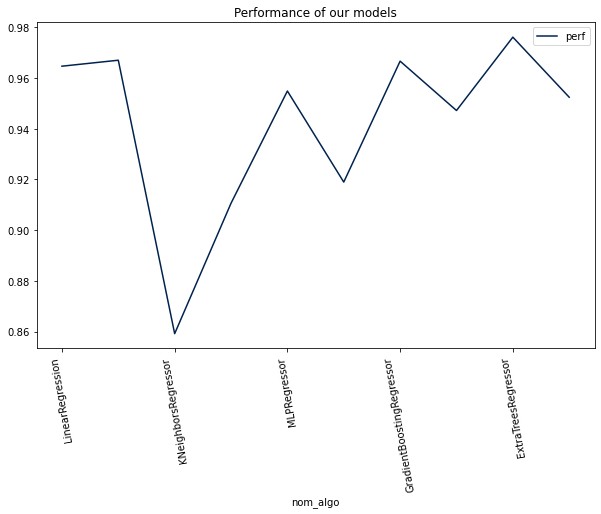

In [20]:
#See the result in a graph
df_result1[["perf"]].plot(kind='line', rot=100, figsize=(10,6),colormap='cividis').set(title='Performance of our models')

###  GradientBoostingRegressor model seems to have the best score with more than 0.97.

## Feature Engineering
### Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used. So we will try to improve our models with some transformation on our data like imputation, handling Outliers, binning or Standard Scaler transform.

#### 1.Standarization of variables to see if the result can be better

In [21]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
X_train_1  = scaler.fit_transform(X_train)
X_test_1  = scaler.fit_transform(X_test)

In [22]:
X_train_1

array([[ 1.30865797, -1.03684361,  1.18169708, ..., -0.69617706,
        -0.12700645,  0.08929327],
       [-0.1061074 , -1.03684361,  0.48500493, ...,  1.56365133,
         4.45933757,  0.08929327],
       [ 1.07286374, -1.03684361,  0.94946636, ..., -0.30051085,
         0.33162795, -0.00593335],
       ...,
       [ 1.07286374, -1.03684361,  1.18169708, ..., -0.48698215,
         1.70753116,  0.94633282],
       [ 0.12968683, -1.03684361,  0.02054349, ..., -0.41536836,
        -0.12700645, -0.00593335],
       [ 0.60127528, -1.03684361,  0.48500493, ..., -0.75522402,
        -0.12700645, -0.56777039]])

In [23]:
# Let's see the result
algorithme=GradientBoostingRegressor()
get_score(algorithme, X_train_1, X_test_1, Y_train, Y_test)

GradientBoostingRegressor()


0.9117301916746561

As we see the result is worst than before so we don't change our dataset

#### 2. Imputation of variables

In [24]:
df.columns

Index(['START YEAR', 'START QUARTER', 'COMPLETION YEAR', 'COMPLETION QUARTER',
       'V-1', 'V-2', 'V-3', 'V-4', 'V-5', 'V-6', 'V-7', 'V-8', 'V-9'],
      dtype='object')

In [25]:
# We will remove all variables which gave a big correlation between themself
# We remove also V-1 feature because it is zip code and it is noise for the model

df.drop(columns=["START YEAR", "V-3","V-1"], inplace=True)

In [26]:
#Drop the duplicated observations
df=df.drop_duplicates()
df.shape

(372, 10)

## Grid search : Machine learning models have hyperparameters that you must set in order to customize the model to your dataset.

Often the general effects of hyperparameters on a model are known, but how to best set a hyperparameter and combinations of interacting hyperparameters for a given dataset is challenging. There are often general heuristics or rules of thumb for configuring hyperparameters.

In [27]:
from sklearn.model_selection import GridSearchCV
rfc=GradientBoostingRegressor()

param_grid = { 
    'learning_rate':[0.1,0.01],
    'n_estimators':[100,1000],
    'subsample':[0.1,0.2,0.3],
    'max_depth':[1,5,10,20]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [1, 5, 10, 20],
                         'n_estimators': [100, 1000],
                         'subsample': [0.1, 0.2, 0.3]})

In [28]:
CV_rfc.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.2}

In [29]:
# Let's choose the best hyperparameters ans see the score of our model
hyperparametres = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.2}
algorithme=GradientBoostingRegressor(**hyperparametres)
score      = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score
print(score)

GradientBoostingRegressor(max_depth=5, subsample=0.2)
0.9668313788855171


### Thanks to our GridSearch we improve our score model 

## To conclude let's test the best model and see the feature importance

In [30]:
# Prepare the model and let's make a prediction
model=GradientBoostingRegressor(**hyperparametres)
res = model.fit(X_train, Y_train)
train_result = res.score(X_test,Y_test)
# Estimate accuracy on validation set
predicted_tuned = model.predict(X_test)
print(res.score(X_test,Y_test))

0.961079832486891


In [31]:
y_pred = model.predict(X_test)
model

GradientBoostingRegressor(max_depth=5, subsample=0.2)

[Text(0.5, 1.0, 'Feature Importance')]

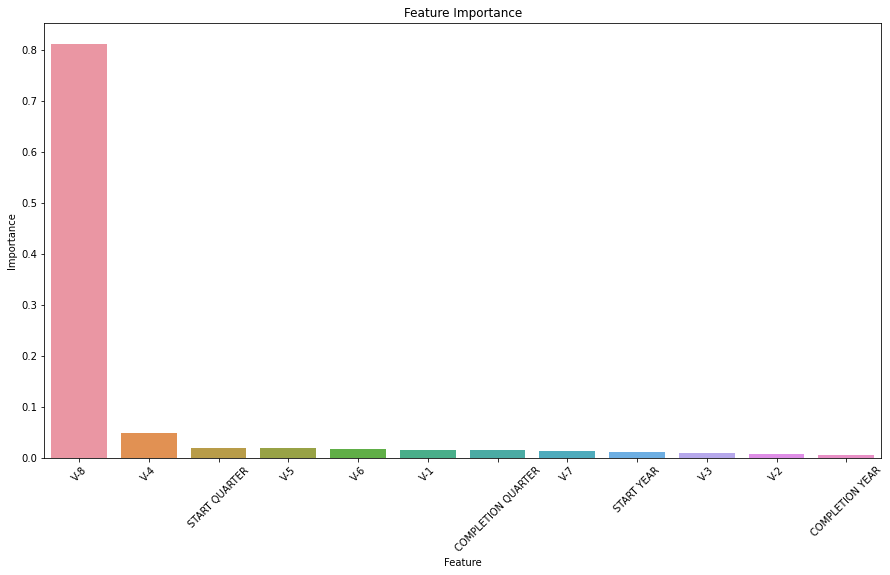

In [32]:
# Let's see the importance of the variables to see which one have an impact on our target
feature_imp = pd.DataFrame(sorted(zip(X_train.columns, model.feature_importances_), key=lambda k: k[1], reverse=True))
feature_imp.columns = ['Feature', 'Importance']
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation=45)
sns.barplot(data=feature_imp, x='Feature', y='Importance').set(title='Feature Importance')

### As you see, the V-8 variable which is the Price of the unit at the beginning of the project per m2 is the most important feature in our model in order to predict the Actual sales prices (output) . With a score of 97% on the test set, our model is very efficient by using the GradientBoosting Model and tunning his hyperparameters